# 4주차: 자료 시각화 및 통계적 가설 검증을 활용한 데이터 분석
---
## 보고서: 한문 고전 번역을 위한 데이터 분석
**1. 서론**

한문 고전 번역을 위한 Seq2Seq 모델 개발의 초기 단계로서, 한문과 한글 문장의 토큰화된 데이터에 대한 분석을 수행하였습니다. 이 분석은 모델 설계에 필요한 데이터의 특성을 이해하는 데 중점을 두었으며, 시각화 및 통계적 가설 검증을 통해 한문과 한글 간의 구조적 차이를 파악하고자 하였습니다.

**2. 데이터 시각화 결과**

**2.1. 한문과 한글의 토큰 길이 분포**

한문과 한글 문장의 토큰 길이를 산점도로 시각화한 결과, 점들이 상대적으로 왼쪽(한글 데이터)으로 치우쳐진 것을 통해, 한글 문장의 토큰 길이가 한문보다 더 길다는 것을 확인할 수 있었습니다. 이는 한문이 한글에 비해 더 압축된 표현을 사용하는 경향이 있음을 시사합니다.

**2.2. 토큰 빈도 분석**

한문과 한글에서 자주 사용된 상위 20개의 토큰을 분석한 결과, 두 언어의 빈도 높은 토큰을 확인할 수 있었습니다. 한문에서는 '之, 日, 不, 以'와 같은 한자의 사용 빈도가 높았고, 한글에서는 '이, 을, 에, 의' 등의 단어가 사용 빈도가 높았습니다. 이를 통해, 한문과 한글 모두 특정한 상황을 나타내는 토큰보다는 문법적 요소와 관련된 토큰이 빈도가 높다는 것을 알 수 있었습니다.

**3. 통계적 가설 검증 결과**

**3.1. 한문과 한글의 토큰 길이 차이에 대한 T-검정**

T-검정 결과, T-통계량이 -26.776, p-value가 6.467e-158로 나타났습니다. p-value가 매우 작아 한문과 한글 문장의 토큰 길이 차이는 통계적으로 유의미함을 확인할 수 있었습니다. 이 결과는 한문과 한글이 번역 시 문장 길이에서 큰 차이가 있음을 시사합니다.

**3.2. 한문과 한글의 토큰 분포 차이에 대한 카이제곱 검정**

카이제곱 검정 결과, Chi2 통계량이 1003479.33, p-value가 0으로 나타났습니다. 이는 한문과 한글의 토큰 분포가 유의미하게 다르다는 것을 의미합니다. 이 차이는 모델이 번역 과정에서 각 언어의 특성을 고려해야 함을 강조합니다.

**4. 결론**

본 분석을 통해 한문과 한글 데이터가 구조적으로 상당히 다르다는 것을 확인하였습니다. 이러한 차이는 Seq2Seq 모델 설계 시 중요한 고려 요소가 될 것이며, 이를 기반으로 모델이 두 언어 간의 번역 성능을 향상시킬 수 있는 방향으로 개발될 수 있을 것입니다.

**5. 향후 연구 방향**

추후 Seq2Seq 모델이 개발되면, 해당 모델의 번역 성능을 정량적으로 평가하고, 한문과 한글 간의 차이를 효과적으로 다룰 수 있는 방법을 연구할 예정입니다.


In [ ]:
import os
import pandas as pd

# 경로 설정
path = '/content/drive/MyDrive/hanja_korean_dataset/token'

# 폴더 내 모든 parquet 파일 불러오기
parquet_files = [file for file in os.listdir(path) if file.endswith('.parquet')]

# 데이터프레임 리스트 초기화
dfs = []

# 각 parquet 파일을 데이터프레임으로 읽어서 리스트에 추가
for file in parquet_files:
    file_path = os.path.join(path, file)
    df = pd.read_parquet(file_path)
    dfs.append(df)

# 모든 데이터프레임을 하나로 합치기
merged_df = pd.concat(dfs, ignore_index=True)

# 합쳐진 데이터프레임 출력
merged_df

,hanja,korean
0,"[兵, 批, 參, 議, 崔, 尙, 儒, 進, 以, 韓, 啓, 宇, 爲, 盆, 山, ...","[병비, 에, 참의, 최상, 유, 는, 나왔다, 한계, 우, 를, 분산, 별장, 으..."
1,"[吏, 曹, 啓, 目, 前, 五, 衛, 將, 朴, 枝, 藩, 名, 字, 改, 以, ...","[이조, 계목, 에전, 오, 위장, 박지, 번, 이, 이름, 을, 형진, 으로, 출..."
2,"[上, 在, 景, 福, 宮, 停, 常, 參, 經, 筵]","[상이, 경복궁, 에, 있었다, 상, 참과, 경연, 을, 정지, 하였다]"
3,"[奎, 章, 閣, 啓, 曰, 檢, 書, 官, 李, 冕, 翼, 有, 身, 病, 勢, ...","[규장각, 이, 아뢰, 기를, 검, 서관, 이면, 익, 이, 신병이, 있어서, 직임..."
4,"[禮, 曹, 啓, 曰, 郊, 壇, 四, 孟, 朔, 遣, 禮, 郞, 看, 審, 有, ...","[예조, 가, 아뢰, 기를, 교단, 에, 사맹삭, 마다, 예조, 낭청, 을, 보내어..."
...,...,...
1022157,"[義, 禁, 府, 啓, 曰, 戊, 子, 十, 一, 月, 二, 十, 二, 日, 前, ...","[의금부, 가, 아뢰, 기를, 무자년, 1648, 인조, 26, 11월, 22일, ..."
1022158,"[上, 在, 昌, 德, 宮, 停, 常, 參, 經, 筵]","[상이, 창덕궁, 에, 있었다, 상, 참과, 경연, 을, 정지, 하였다]"
1022159,"[申, 時, 太, 白, 見, 於, 未, 地, 夜, 一, 更, 至, 四, 更, 月, 暈]","[신시, 에, 태백성, 이, 미지, 에, 나타났다, 밤, 1, 경, 부터, 4, 경..."
1022160,"[大, 司, 憲, 金, 南, 重, 執, 義, 柳, 慶, 昌, 掌, 令, 申, 悅, ...","[대사헌, 김남중, 집의, 유경, 창, 장령, 신열, 도, ㆍ, 신속, 지평, 이수..."


In [ ]:
# 결측값 확인
print(merged_df.isnull().sum())

hanja     0
korean    0
dtype: int64


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/opentype: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/opentype/noto: caching, new cache contents: 30 fonts, 0 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/opentype: skipping, looped directory detected
/usr/share/fonts/truetyp

In [ ]:
import matplotlib.font_manager as fm
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

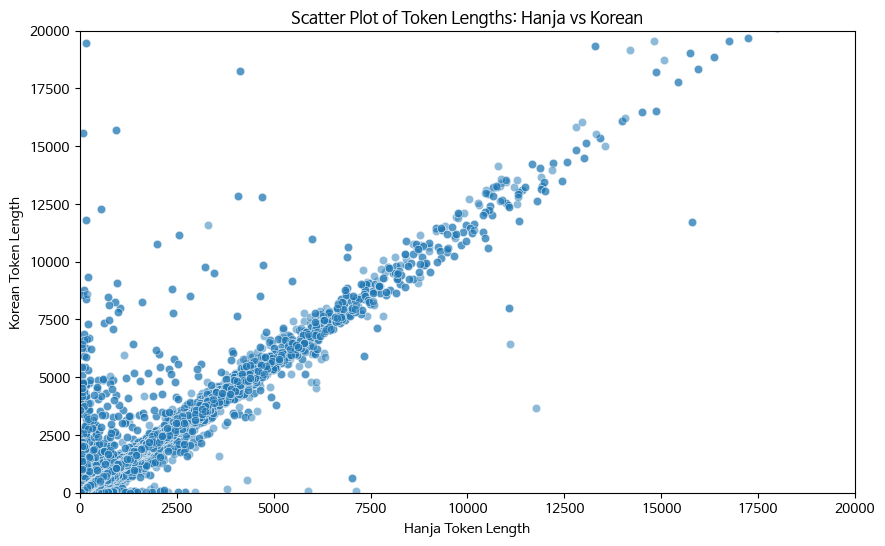

In [ ]:
# 데이터프레임 복사
df = merged_df.copy()

# 한문과 한글 토큰 길이 계산
df['hanja_token_length'] = df['hanja'].apply(len)
df['korean_token_length'] = df['korean'].apply(len)

# 산점도 시각화
plt.figure(figsize=(10, 6))  # 그래프 크기 설정

sns.scatterplot(x='hanja_token_length', y='korean_token_length', data=df, alpha=0.5)

# x축과 y축 범위 설정
plt.xlim(0, 20000)
plt.ylim(0, 20000)

plt.title('Scatter Plot of Token Lengths: Hanja vs Korean')
plt.xlabel('Hanja Token Length')
plt.ylabel('Korean Token Length')

plt.show()

In [ ]:
# 모든 토큰을 평탄화하여 토큰 빈도 계산
from collections import Counter

hanja_tokens = [token for sublist in df['hanja'] for token in sublist]
korean_tokens = [token for sublist in df['korean'] for token in sublist]

hanja_token_counts = Counter(hanja_tokens).most_common(20)
korean_token_counts = Counter(korean_tokens).most_common(20)

# 데이터프레임 생성 후 시각화
hanja_df = pd.DataFrame(hanja_token_counts, columns=['Token', 'Frequency'])
korean_df = pd.DataFrame(korean_token_counts, columns=['Token', 'Frequency'])

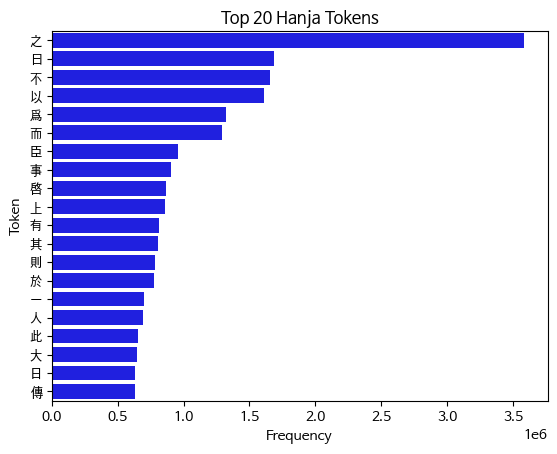

In [ ]:
sns.barplot(x='Frequency', y='Token', data=hanja_df, color='blue')
plt.title('Top 20 Hanja Tokens')
plt.show()

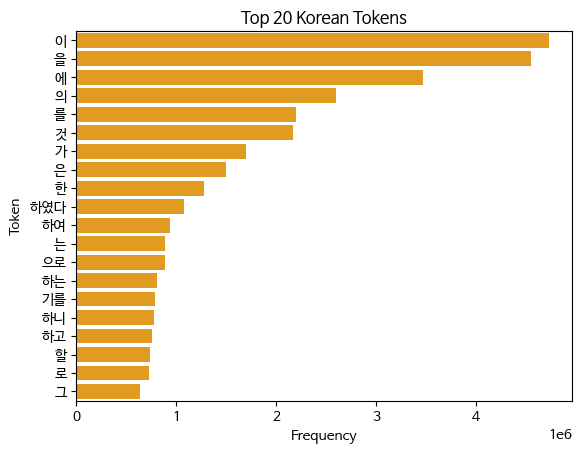

In [ ]:
sns.barplot(x='Frequency', y='Token', data=korean_df, color='orange')
plt.title('Top 20 Korean Tokens')
plt.show()

In [ ]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(df['hanja_token_length'], df['korean_token_length'])
print(f'T-statistic: {t_stat}, P-value: {p_value}')

if p_value < 0.05:
    print("한문과 한글의 토큰 길이 차이는 유의미하다.")
else:
    print("한문과 한글의 토큰 길이 차이는 유의미하지 않다.")

T-statistic: -26.77648197327024, P-value: 6.467379138704904e-158
한문과 한글의 토큰 길이 차이는 유의미하다.


In [ ]:
from scipy.stats import chi2_contingency

# 빈도 테이블 생성
token_table = pd.DataFrame({'Hanja': hanja_df['Frequency'], 'Korean': korean_df['Frequency']})

# 카이제곱 검정
chi2, p, dof, ex = chi2_contingency(token_table)
print(f'Chi2 Statistic: {chi2}, P-value: {p}')

if p < 0.05:
    print("한문과 한글의 토큰 분포 차이는 유의미하다.")
else:
    print("한문과 한글의 토큰 분포 차이는 유의미하지 않다.")

Chi2 Statistic: 1003479.3298415871, P-value: 0.0
한문과 한글의 토큰 분포 차이는 유의미하다.
